In [1]:
import pandas as pd
import sqlite3

In [2]:
con = sqlite3.connect(f"file:../data/db/soccer.db?mode=rw", uri=True) 
# 获取cursor对象 
cur = con.cursor() 

In [3]:
results = pd.read_sql("""
            SELECT *
            FROM Accuracy
            where team = 'Man City' and model = 'OAZM'
            """, con)

In [4]:
train_results = results[results['type'] == 'test']

train_results

,id,model,team,type,epoch,loss,acc
20,1e77669f-487d-4c52-9f31-bad4279f4b50,OAZM,Man City,test,0.0,1.599665,0.800
21,8268d3b1-6ed1-4825-9887-06f4ba22d286,OAZM,Man City,test,1.0,1.229350,0.650
22,1fc5840c-d317-4f48-9983-515545a8ac57,OAZM,Man City,test,2.0,1.080984,0.650
23,ecca2b52-a53c-493b-b2dc-a810996c35df,OAZM,Man City,test,3.0,0.992801,0.625
24,b6b53879-b994-4356-90fd-f4aae380b52e,OAZM,Man City,test,4.0,0.926601,0.675
25,4d5554bc-dbf7-44da-a33e-d7d644b47898,OAZM,Man City,test,5.0,0.889520,0.675
26,be3a26c3-47f7-4090-b81f-6667871dbed5,OAZM,Man City,test,6.0,0.848160,0.675
27,04eea902-c579-4d02-91cd-d71a09d1dd6d,OAZM,Man City,test,7.0,0.826934,0.700
28,4ed5508a-0c3e-424c-acca-10828e2a3529,OAZM,Man City,test,8.0,0.798910,0.725
29,9151e136-b773-465d-b3ab-d9f434396df3,OAZM,Man City,test,9.0,0.787599,0.675


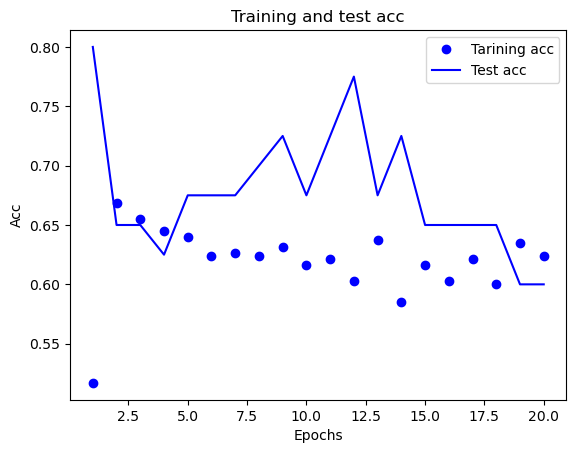

In [5]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_results) + 1)

plt.plot(epochs, results[results['type'] == 'train']['acc'], 'bo', label="Tarining acc")
plt.plot(epochs, results[results['type'] == 'test']['acc'], 'b', label="Test acc")
plt.title('Training and test acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

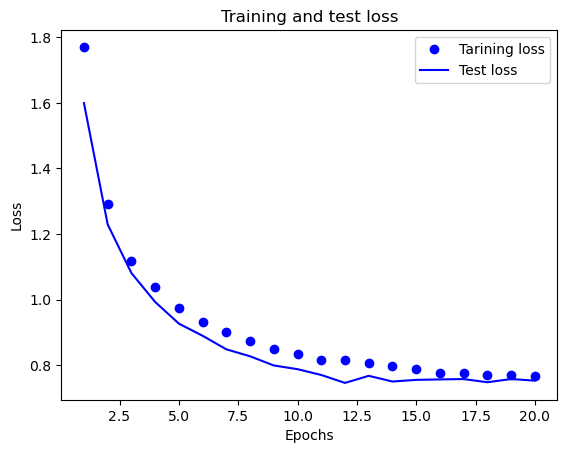

In [6]:

epochs = range(1, len(train_results) + 1)

plt.plot(epochs, results[results['type'] == 'train']['loss'], 'bo', label="Tarining loss")
plt.plot(epochs, results[results['type'] == 'test']['loss'], 'b', label="Test loss")
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()